In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Market_basket_df.csv')
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 500)
df['NAME'] = df['NAME'].str.strip()
df['RECEIPT'] = df['RECEIPT'].astype('str')
df['UNITS'] = df['UNITS'].astype('float64')
df['UNITS'] = df['UNITS'].round(0)
print(df)

           DATENEW                               RECEIPT                        NAME  UNITS
0       2016-03-16  d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9       Pumpkin Japanese/Kent    3.0
1       2016-03-16  d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9                Orange navel    0.0
2       2016-03-16  f4dd518d-1fd8-4339-abc6-2c5390c20e30                Orange navel   -1.0
3       2016-03-16  aa299de6-1332-48ba-bce9-de8cbb48741e  Australian Asparagus green    3.0
4       2016-03-16  aa299de6-1332-48ba-bce9-de8cbb48741e           Nice Munchee 200g    1.0
...            ...                                   ...                         ...    ...
659216  2019-10-13  5cb041e2-1976-45b4-ba06-7779d6893156    Curry powder250g kandyan    1.0
659217  2019-10-13  5cb041e2-1976-45b4-ba06-7779d6893156            Banana Cavendish    1.0
659218  2019-10-13  5cb041e2-1976-45b4-ba06-7779d6893156             Tomatoes Cherry    1.0
659219  2019-10-13  8e1e8d7c-9247-44bc-b50e-dd01acb68974                 Onion b

In [5]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from tqdm import tqdm
import matplotlib.pyplot as plt
import regex as re

In [6]:
def plot_bar_x(data):
    plt.figure(1,figsize=(20, 10))
    data=data.head(30)
    # this is for plotting purpose
    index = np.arange(len(data.index))
    plt.bar(index, data['NAME'])
    plt.xlabel('Item Names', fontsize=10)
    plt.ylabel('Items Sold Count', fontsize=10)
    plt.xticks(index, data.index, fontsize=10, rotation=90)
    plt.title('Frequency Distribution Of Each Item')
    plt.show()
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    if x=='nan':
        return 0

                                   NAME
Banana Cavendish                  43696
Field Tomatoes                    20427
Watermelon seedless               13128
Capsicum red                      11493
Cucumber Lebanese                 10539
...                                 ...
Hot and Spicy Mix                     1
Derana white keeri samba 5kg          1
Kithul Jaggary 450g                   1
Bruschetta ai peperoni                1
Apple & Blackcurrant Juice 350ml      1

[1265 rows x 1 columns]


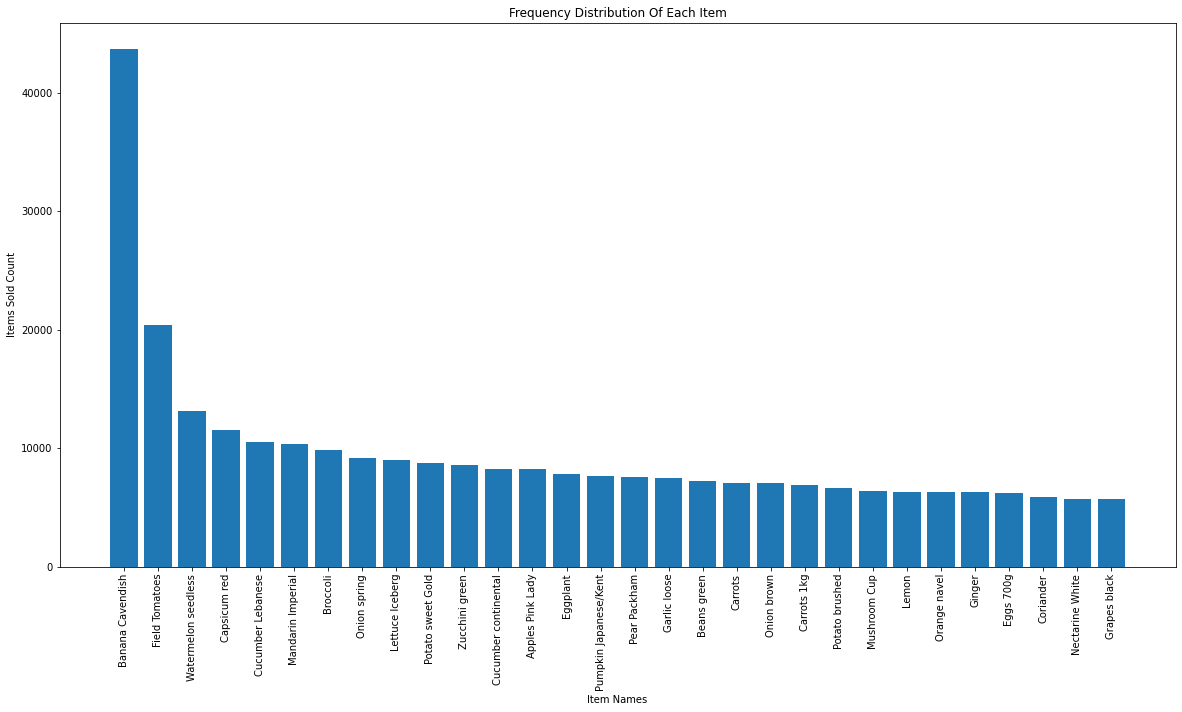

In [7]:
item_frequency=df['NAME'].value_counts()
item_frequency=pd.DataFrame(item_frequency)
print(item_frequency)
plot_bar_x(item_frequency)

In [8]:
basket = (df
          .groupby(['RECEIPT', 'NAME'])['UNITS']
          .sum().unstack().reset_index().fillna(0)
          .set_index('RECEIPT'))

basket_sets = basket.applymap(encode_units)

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3kg Valencia Oranges),(Banana Cavendish),0.010238,0.202841,0.003451,0.337091,1.661846,0.001374,1.202516
1,(Banana Cavendish),(3kg Valencia Oranges),0.202841,0.010238,0.003451,0.017014,1.661846,0.001374,1.006893
2,(Apples Fuji),(Banana Cavendish),0.019745,0.202841,0.005655,0.286390,1.411894,0.001650,1.117079
3,(Banana Cavendish),(Apples Fuji),0.202841,0.019745,0.005655,0.027878,1.411894,0.001650,1.008366
4,(Apples Fuji),(Mandarin Imperial),0.019745,0.043463,0.002022,0.102421,2.356507,0.001164,1.065686
5,(Mandarin Imperial),(Apples Fuji),0.043463,0.019745,0.002022,0.046529,2.356507,0.001164,1.028091
6,(Apples Granny Smith),(Banana Cavendish),0.021855,0.202841,0.007018,0.321096,1.582994,0.002584,1.174185
7,(Banana Cavendish),(Apples Granny Smith),0.202841,0.021855,0.007018,0.034597,1.582994,0.002584,1.013198
8,(Apples Granny Smith),(Pear Packham),0.021855,0.034934,0.002077,0.095047,2.720720,0.001314,1.066426
9,(Pear Packham),(Apples Granny Smith),0.034934,0.021855,0.002077,0.059462,2.720720,0.001314,1.039984
